# Energieeffiziente und klimafreundliche Gebäude

- [ ] TODO Zitierweise, Danksagung Förderung einfügen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.21.1
matplotlib 3.4.2
pandas 1.3.0
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/3.7.2/lib/python3.7/datetime.py'>
seaborn 0.11.1
plotly 5.1.0
sys 3.7.2 (default, Jul 22 2021, 09:40:35) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/3.7.2/lib/python3.7/os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.0


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"
pd.set_option('display.latex.repr', True)
pd.set_option('display.latex.longtable', True)

- [ ] TODO am Anfang immer die gleichen Layoutparameter laden -> in allen notebooks aktualisieren

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diesen Abschnitt:</b></div>
    <ul>
        <li> Anforderungen an Heizung und Kühlung verstehen </li>
        <li> Klimawirkung von Gebäudetechnologien kennen </li>
        <li> mit einigen wichtigen Kennzahlen </li>
        <li> um Energiesparpotenziale und Klimafreundlichkeit überblicksartig zu bewerten </li>
    </ul>
</div>

## Erster Einblick: Energieeffiziente Gebäude in der EU

1. in Kleingruppen
2. [EU buildings datamapper](https://ec.europa.eu/energy/eu-buildings-datamapper_en) öffnen
3. alle interessanten Browser-Tabs offen lassen
4. etwas finden, dass _Sie_ überraschend finden zu
 1. inadequaten Wohnbedingungen und Heizung
 2. Energieverbrauch in Gebäuden
 3. Null-Energie-Gebäuden
5. teilen Sie Ihre Ergebnisse im Plenum
6. Wenn Sie in der Kleingruppe diskutiert hatten: teilen Sie das auch!

### Überblick über Gebäudeenergie

![Energieeffizienz in Gebäuden in der EU](https://ec.europa.eu/info/sites/info/files/energy_climate_change_environment/news/images/builings_efficiency_buildings.jpg)

![Einsparpotenziale in Gebäuden](http://wiki.energytransition.org/files/2018/10/BL_ET_update_2018_The-housing-sector-offers-large-potential-for-energy-savings-.png)

- [ ] TODO LCA in Gebäuden ../img/lca-gebaeude.svg

### Beispielgebäude: Mehrfamilienhaus

Daten aus einer Studie des Umweltbundesamtes {cite:p}`mahler_energieaufwand_2017`

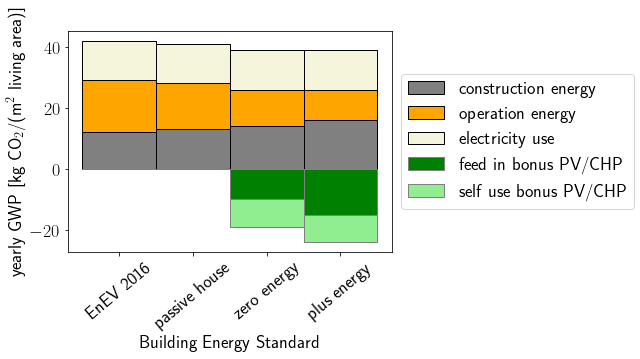

In [3]:
fig=plt.figure(figsize=(8,5))
ax=plt.subplot(111)
 
# Values of each group
constructionenergy = [12, 13, 14,16]
operationenergy = [17, 15,12,10]
electricityuse = [13, 13, 13,13]
feedinbonus = [0, 0, -9,-9]
selfusebonus = [0, 0, -10, -15]

contrib = ['construction energy','operation energy', 'electricity use', 'feed in bonus PV/CHP', 'self use bonus PV/CHP']
 
# Heights of bars1 + bars2
bars = np.add(constructionenergy, operationenergy).tolist()
bonus = np.add(feedinbonus,selfusebonus).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['EnEV 2016','passive house','zero energy','plus energy']
barWidth = 1
 
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8,box.height])

ax.bar(r, constructionenergy, color='gray', edgecolor='black', width=barWidth)
ax.bar(r, operationenergy, bottom=constructionenergy, color='orange', edgecolor='black', width=barWidth)
ax.bar(r, electricityuse, bottom=bars, color='beige', edgecolor='black', width=barWidth)
ax.bar(r, bonus, color='green', edgecolor='gray', width=barWidth)
ax.bar(r, feedinbonus, bottom = selfusebonus, color='lightgreen', edgecolor='gray', width=barWidth)
 
# Custom X axis
ax.set_xticks(r)
ax.set_xticklabels(names,rotation=40)
ax.set_xlabel("Building Energy Standard")
ax.set_ylabel(r'yearly GWP [kg CO$_2$/(m$^2$ living area)]')
ax.legend(contrib,loc='center left', bbox_to_anchor=(1,.5))

plt.tight_layout()

#### Globales Erwärmungs-Potenzial der Bauphase

Daten aus einer Studie des Umweltbundesamtes {cite:p}`mahler_energieaufwand_2017` für ein neugebautes Mehrfamilienhaus mit Plusenergiestandard

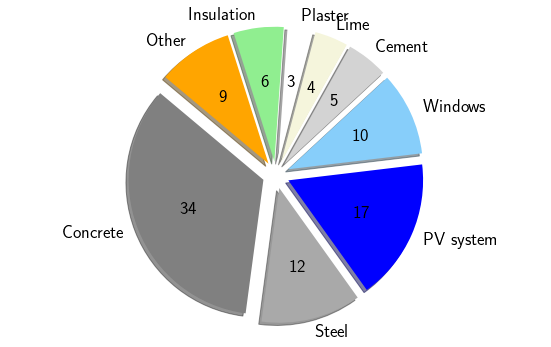

In [4]:
plt.figure(figsize=(8,5))
 
# Data to plot
labels = 'Concrete', 'Steel', 'PV system', 'Windows', 'Cement', 'Lime', 'Plaster', 'Insulation', 'Other'
sizes = [0.34, 0.12, 0.17, 0.1, .05, .04,.03,.06,.09]
colors = ['gray', 'darkgray', 'blue', 'lightskyblue','lightgray', 'beige','white','lightgreen','orange']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.tight_layout()

#### Globales Erwärmungs-Potenzial der Nutzung für 50 Jahre

Daten aus einer Studie des Umweltbundesamtes {cite:p}`mahler_energieaufwand_2017` für ein Mehrfamilienhaus mit 1731 m² - Energie ist ein Thema!

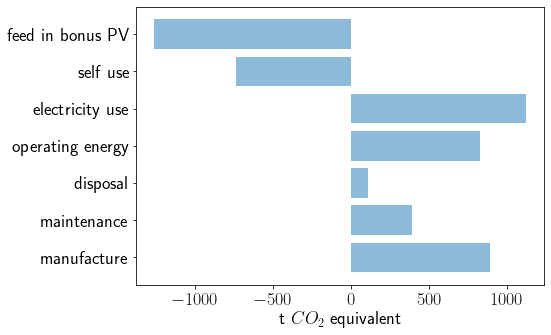

In [5]:
plt.figure(figsize=(8,5))

phases = ('manufacture', 'maintenance', 'disposal', 'operating energy', 'electricity use', 'self use', 'feed in bonus PV')
y_pos = np.arange(len(phases))
performance = 0.001*np.array([888819, 387769, 108237, 824021, 1119195, -739788, -1259669])

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, phases)
plt.xlabel(r't $CO_2$ equivalent')

plt.tight_layout()

#### Woher kommen Effizienzverbesserungen? (JUPY)

- Auf zoom Whiteboard diskutieren (oder cryptopad o.ä.)

_zoom_: mit der Maus über die grüne Fläche gehen, dann auf Optionen (_options_) klicken und dann auch Kommentieren (_annotate_), dort dann `T` für Text auswählen und Ideen auf das Whiteboard schreiben

### Aktive und passive Maßnahmen, die den $\text{CO}_2$-Fußabdruck verbessern 

- **passive Maßnahmen** benötigen keine zusätzliche Energie während der Nutzung, z. B. Isolierung, Nutzerschulung und Verhaltensänderung, solare Gewinne, Abwäreme und überschüssige Kälte nutzen

- **aktive Maßnahmen** benötigen Energie während der Nutzung und hängen daher vom $\text{CO}_2$-Fußabdruck des Energieträgers und der Effizienz ab, z. B. effiziente Heizung, Kühlung, Lüftung 

- **positiv wirksame aktive Maßnahmen** sind erneuerbare Energieerzeugung mit Photovoltaik (PV) oder Kraft-Wärme-Kopplung (KWK) mit Biomasse

#### Wichtigste Energiesparpotenziale

[CO2online](https://www.co2online.de/energie-sparen/) nennt
- Heizen: 70-90%
- Strom: 10-25%

### Geforderte Lufttemperatur nach DIN 12831-1

| **Raum** | **Wert**|
|-|-|
| Büro | 20°C | 
| Hörsaal | 20°C |
|Cafeteria | 20°C | 
| Klassenraum | 20°C |
| Kindergarten | 20°C |
| Laden | 16°C |
| Wohnzimmer | 20°C | 
| Bad | 24°C |
| Kirche | 15°C |
| Museum | 15°C |

#### Diskutieren Sie Anforderungen an Raumtemperatur (JUPY)

in Kleingruppen
1. Gegenstimmen? Sind diese Temperaturen für einige zu heiß oder zu kalt?
2. Was könnte passieren, wenn die Tempearturen zu heiß oder zu kalt sind?
3. Was könnten saisonale Einsparpotenziale sein?

#### Zu kalt verstärkt Schimmelbildung

In [6]:
# <a title="NordhornerII, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Moldy_Housecorner_both_Sides.jpg"><img width="512" alt="Moldy Housecorner both Sides" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Moldy_Housecorner_both_Sides.jpg/512px-Moldy_Housecorner_both_Sides.jpg"></a>

#### Zu kalt könnte Rohre beschädigen

Wasserrohre können brechen, wenn Wasser gefriert - hoher Schaden

#### (Nicht nur) Die Arbeitsqualität ist bei Komforttemperatur am besten

{cite:p}`alan_hedge_linking_2004` zeigt auf, dass bei einer Raumtemperatur von 25°C statt 20°C:
- Fehler um 44% reduziert werden
- Tastatur-Ausgaben um 150% erhöht werden

{cite:p}`williams_experiencing_2008` hat erforscht, dass zwischenmenschliche Wärme-Gefühle mit physischer Wärme korreliert sind:
- erhöhtes Vertrauen
- besonders wichtig in Pflege-Umgebungen (Krankenhäuser etc.)

#### Deutsche Arbeitsplatzregeln für gute Temperatur {cite:p}`gmbi_notitle_nodate`

- schwere körperliche Arbeit bei 12°C
- nicht so schwere körperliche Arbeit bei ständiger Bewegung bei 17-19°C
- sitzende Arbeit bei 19-20°C, max. 26°C
- Pausenräume mindestens 21°C
- Duschen mindestens 24°C

#### Deutsche Arbeitsplatzregeln für warme Situationen {cite:p}`gmbi_notitle_nodate`

Tempearturen über 26°C sollen vermieden werden oder erleichtert werden durch: 
- Sonnenschutz
- nächtliches Kühlen und Lüften
- Reduzieren von thermischen Lasten (elektrische Geräte nur wenn nötig anmachen)
- Lüften in den frühen Morgenstunden
- SArbeitszeiten in die frühen Morgenstunden verschieben
- Kleidungsregeln erleichtern
- Wasser an Beschäftigte ausgeben
- oberhalb von 35°C sind technische Maßnahmen und persönliche Schutzausrüstung verpflichtend

#### Inidivudel benötigte Komforttemperatur kann stark abweichen

z. B. haben Frauen eine bis zu 35% reduzierte metabolische Rate verglichen mit Männern {cite:p}`arciero_resting_1993`
- weniger Muskeln
- weniger Blutfluß durch Extremitäten (Arme, Beine)

$\to$ {cite:p}`chang_battle_2019` behaupten, dass die Produktivität bei Frauen bei höherer Bürotemperatur stärker steigt als die Produktivität von Männern (allerdings basieren diese Ergebnisse nur auf einem einstündigen Prüfung)

in jedem Fall: dicht besetzte Räume benötigen weniger Heizung wegen der menschlichen lHeizleistung

[Umweltbundesamt](https://www.umweltbundesamt.de/umwelttipps-fuer-den-alltag/heizen-bauen/heizen-raumtemperatur#gewusst-wie) schlägt in Schlafräumen und nachts eine 5 K reduzierte Temperatur vor

und: Komfortemperaturhängt von Feuchte und Außentemperatur ab:

#### Fechte und Komforttemperatur

<a title="Center for the Built Environment, University of California Berkeley, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Temperature-relative_humidity_chart_-_PMV_method.png"><img width="512" alt="Temperature-relative humidity chart - PMV method" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Temperature-relative_humidity_chart_-_PMV_method.png/512px-Temperature-relative_humidity_chart_-_PMV_method.png"></a>

#### Außentemperatur beeinflußt Komforttemperatur

<a title="Center for the Built Environment, University of California Berkeley, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Adaptive_chart_-_adaptive_method.png"><img width="512" alt="Adaptive chart - adaptive method" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Adaptive_chart_-_adaptive_method.png/512px-Adaptive_chart_-_adaptive_method.png"></a>

vielleicht unterscheiden sich daher Klimatisierungsnormen weltweit

#### Gesünderer Innenraum-Komfort {cite:p}`jutta_durkop_gesunder_2005`

- _lüften_
- chemische Emissionen (z. B. Klebstoffe, Teppiche, Zigarettenrauch, oft VOCs = _volatile organic compounds_)
- $\text{CO}_2$ Niveau innen reduzieren (undSauerstoff-Anteil erhöhen)
- Feuchte reduzieren und damit Schmimmel vorbeugen
- unvollständige Verbrennungsprodukte reduzieren (Holz / Gasheizung, Gaskochen), z. B. NO_x, CO)
- _Temperatur anpassen_ - wenn zu hoch, sind Atmungserkrankungen wahrscheinlicher

#### Typische Einsparpotenziale

**Gebäudedesign**
- gute Isolierung (dicht, geringe Verlustwerte) von Fenstern und Wänden
- effiziente Heizung, Lüftung, Kühlung

**Anwesenheits- und nutzungsbasierte Regelung**
- nachts niedrigere Temperatur
- vorzugsweise nachts lüften (im Sommer) oder tags (im Winter)
- Luftaustausch, wenn keiner da ist, reduzieren

#### Nutzerschulung

- Fenster i(im Winter)nicht dauernd offen halten
- Kleidung im Keller oder auf dem Balkon trocknen
- Heizung im Sommer abschalten
- Klimaanlage nur bei Anwesenheit
- etc.

#### Heizenergie in Deutschland {cite:p}`wohnen_und_sanieren_wohngebaude-statistiken_2002_bis_heute_verteilung_2019`

In [7]:
#df = pd.read_csv('data/gebaeudedaten-heizenergieverbrauch_allgemein_verteilung-bundesweit.csv',skiprows=1,sep=';',decimal=',')
##df['10'].head(10)
##df['0,02'].head(10)

#plt.figure(figsize=(10,5))
#plt.bar(df['10'],df['0,02'])
#plt.grid(True)
#plt.ylabel('Prozentsatz')
#plt.xlabel(r'kWh per m$^2$ and year')

#plt.tight_layout()

#### Benötigte durchschnittliche Wassertemperatur nach DIN 12831-1

| **Raum** | **Wert** |
|-|-|
|Raum | 13°C |
|Raum iaußerhalb der Heizsaison | 20°C |
| kaltes Trinkwaser | $25\cdot U^{-0,2}$ °C |
| warmes Trinkwasser | 57,5°C |
| Speichertemperatur | 55°C |
| kaltes Wasser am Gebäudeeintritt | 10°C |
| Temperaturdifferenz in der Zirkulation | 5 K |

wobei $U$ der Wärmeübergangskoeffizient der Rohrisolation ist, abhängig vom Gebäudestandard zwischen 0,2 und 3 W/m$\cdot$K

#### Hygienesisches Trinkwasser (Legionellen!)

- benötigt kalte Tempertur < 20°C
- oder > 70°C {cite:p}`umweltbundesamt_energiesparen_2011`
- $\to$ unterschiedliche Rohre für Trinkwasser (inkl. Dusche!) und Heizung

#### Lüftung und Luftfeuchteregulierung

- automatische Lüftung inkl. Wärmetauschern ermöglicht verringerte Wärmeverluste verglichen mit manuellem Fensteröffnen - und für bessere Feuchte-Werte als bei zu geringer Lüftung (Schmimmel-Probleme) sorgt es auch, Einsparpotenziale zwischen 15 und 30% {cite:p}`wosnitza_energieeffizienz_2012`
- ein Gebäude benötigt saubere Luft von außen
 - Lüftungszufuhr hauptsächlich für Wohnzimmer, Schlafzimmer, etc.
 - verschmutzte Luft verlässt das Gebäude, möglicherweise über einen Wärmetauscher in Bad und Küche (wo Luftaustausch ist nötig, um Verschmutzungen zu reduzieren)

#### Lüftung und Luftqualitätsregelung

für ausreichende Luftqualität DIN 1946-2 schreibt Mindestluftflüsse vor:
- Wohnzimmer: 30 m³/h
- Wohnzimmer ohne Fenster: 60 m³/h
- Esszimmer ohne Fenster: 60 m³/h
- Schlafzimmer ohne Fenster: 60 m³/h
- Kinderzimmer ohne Fenster: 30 m³/h
- Einzelbüro: 40 m³/h
- Büro ohne Fenster: 30 m³/h
- Großraumbüro: 60 m³/h
- Konferenzraum: 20 m³/h
- Klassenraum: 30 m³/h
- Laden: 20 m³/h
- Restaurant: 30 m³/h

für Innenraumkomfort sind leise, stark verteilte Luftströme nötig

#### Klimatisierung: hauptsächlich gewerbliche Gebäude (Daten aus {cite:p}`gmbh_klimaschutz_2011`)

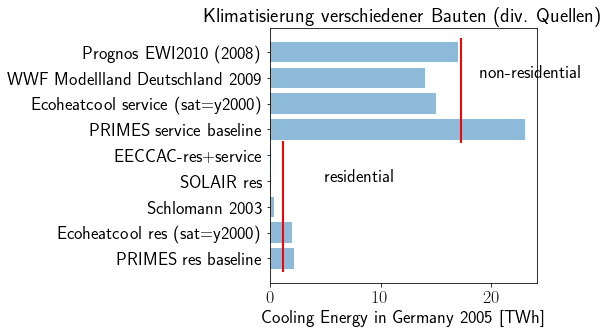

In [8]:
plt.figure(figsize=(8,5))
 
primes = 2.2
ecoheatcool = 2.0
schlomann = .34
solair = .12
eeccac = .07
primesservice = 23
ecoheatcoolservice = 15
wwf = 14
prognos = 17
allvalues = [primes, ecoheatcool, schlomann, solair, eeccac, primesservice, ecoheatcoolservice, wwf, prognos]
meanliving = np.mean(allvalues[0:4])
meancommercial = np.mean(allvalues[5:])

contrib = ['PRIMES res baseline', 'Ecoheatcool res (sat=y2000)', 
           'Schlomann 2003', 'SOLAIR res', 'EECCAC-res+service', 
           'PRIMES service baseline', 
           'Ecoheatcool service (sat=y2000)', 
           'WWF Modellland Deutschland 2009', 'Prognos EWI2010 (2008)']
y_pos = np.arange(len(contrib))
 
plt.barh(y_pos, allvalues, align='center', alpha=.5)
plt.yticks(y_pos, contrib)
plt.xlabel('Cooling Energy in Germany 2005 [TWh]')
plt.plot([meanliving,meanliving],[-.5,4.5],'r-')
plt.text(5,3,'residential')
plt.plot([meancommercial,meancommercial],[4.5,8.5],'r-')
plt.text(19,7,'non-residential')
plt.title('Klimatisierung verschiedener Bauten (div. Quellen)')

plt.tight_layout()

#### Klimatisierung in Detschland

- [ ] TODO noch aus EFF ergänzen und nochmal überarbeiten

## Literatur

```{bibliography}
:filter: docname in docnames
```